In [1]:
import pickle as pkl
import pandas as pd

In [2]:
file_path = "results/adresso/mmse/scores_03101732.pkl"
with open(file_path, "rb") as file:
    results = pkl.load(file=file)
    desc = results[0]
    scores_list = results[1:]
print(desc)

200,50 mmse with SoftKNNMask.


for changing desc if needed

In [3]:
# change_desc = False
# if change_desc:
#     new_desc = f'200, 50 k=11. removed final bn. fixed dense output'
#     results[0] = new_desc
#     with open(file_path, "wb") as file:
#         pkl.dump(obj=results, file=file)

In [4]:
for i, scores in enumerate(scores_list):
    print(abs(scores['nona euclidean mlp'][0]))

print(i+1, 'splits')

0.03148563206195831
0.026853051036596298
0.028290288522839546
0.03328656405210495
0.026148412376642227
0.02511202171444893
0.026892218738794327
0.024881968274712563
0.021962003782391548
9 splits


In [5]:
scores = {method.split(" mlp")[0]: [abs(scores[method][0]) for scores in scores_list] for method in scores_list[0] if "mlp" in method and "cos" not in method}

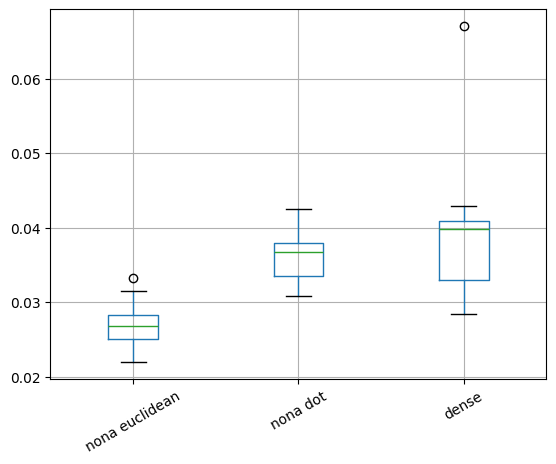

In [6]:
bplot = pd.DataFrame(scores).boxplot(rot=30)
# bplot.set_ylabel('MSE')

In [7]:
pd.DataFrame(scores).median()

nona euclidean    0.026853
nona dot          0.036716
dense             0.039875
dtype: float64

In [8]:
times = {method: [scores[method][1] for scores in scores_list] for method in scores_list[0]}

In [9]:
pd.DataFrame(times).median() / 3600

nona euclidean mlp    0.041468
nona dot mlp          0.016111
dense mlp             0.026230
dtype: float64